In [52]:
import shutil

import numpy as np
import json
from pathlib import Path
import os
import pandas as pd

In [53]:
cl_num = 2
fnum = 5
cl_size = 60
radius = 0.2

exp_dir = Path(f'bnam/cox_dataset_clnum={cl_num}_fnum={fnum}_cl_size=200/bbox=rf,radius={radius}')

res_dir = exp_dir.joinpath('strategy1 results')
res_dir.mkdir(exist_ok=True, parents=True)

test_ids = [cl_size * cli + pt_i for cli in range(cl_num) for pt_i in range(0, 10)]
test_ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]

In [54]:
with open(f"{exp_dir}/../dataset.json") as fp:
    ds = json.load(fp)
ds.keys()

dict_keys(['train_features', 'train_events', 'train_times', 'train_importances', 'test_features', 'test_events', 'test_times', 'test_importances'])

In [55]:
# ', '.join([str(imp) for imp in pd.DataFrame(ds['test_features']).iloc[243].round(2)])

In [56]:
for key in ['test_features', 'test_events', 'test_times', 'test_importances']:
    ds[key] = [ds[key][test_id] for test_id in test_ids]
ds['test_importances']

[[0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5]]

In [57]:
compared_models = {
    'SurvBeNIM1': Path(f'{exp_dir}/bnamimp1_st_1'),
    # 'SurvBeNIM2': Path('bnam/cox_dataset_clnum=2_fnum=5_cl_size=200/bbox=rf/bnam2_st_1'),
    # 'SurvBeXMLP': Path(f'{exp_dir}/baselineimportancesmlp_st_1'),
    'SurvBeX': Path(f'{exp_dir}/survbex_st_1'),
    'SurvNAM': Path(f'{exp_dir}/baselinenam_st_1'),
    'SurvLIME': Path(f'{exp_dir}/survlime_st_1')
}

models_colors = {
    'SurvBeNIM1': '#bd07ea',
    # 'SurvBeNIM2': '#bd07ea',
    'SurvBeXMLP': '#5324ff',
    'SurvBeX': '#077eea',
    'SurvNAM': '#ea07a2',
    'SurvLIME': '#ff3333'
}

for model_path in compared_models.values():
    assert model_path.exists(), model_path

In [58]:
def parse_json(path):
    with open(path) as fp:
        return json.load(fp)


def get_model_importances(model_dir: Path):
    assert model_dir.exists()
    res_files = [
        f"{dir}/{file}"
        for dir, subdirs, files in os.walk(model_dir)
        for file in files
        if file == 'res.json'
           and 'criterion' not in dir
           and int(Path(dir).name.replace('pt=', '')) in test_ids
    ]
    res_files = sorted(res_files, key=lambda x: int(Path(x).parent.name.replace('pt=', '')))
    res_dicts = [parse_json(file) for file in res_files]

    return res_dicts


In [59]:
models_results = {mname: get_model_importances(mdir) for mname, mdir in compared_models.items()}

In [60]:
unique_times = np.sort(np.unique((np.array(ds['train_times']))))
t_deltas = unique_times[1:] - unique_times[:-1]
unique_times

array([177.13040516, 178.57127701, 180.01253765, 180.29475371,
       180.35823689, 180.91762527, 181.01202157, 181.14325593,
       182.09594965, 182.90306453, 182.94730462, 183.56614521,
       183.9268653 , 183.99430911, 184.92300591, 185.01608036,
       185.74807624, 186.38188376, 186.82011505, 186.97573781,
       187.18700821, 187.27652045, 187.44939754, 189.42525467,
       189.45919854, 189.86888225, 191.44097846, 192.47968295,
       192.87118824, 192.9065906 , 192.92847603, 193.01505708,
       193.02487954, 193.0879368 , 193.22327104, 193.66478954,
       193.66975971, 193.79228321, 194.40954094, 194.44427699,
       194.54238442, 194.58332314, 194.61708115, 194.986727  ,
       195.26526115, 195.36903898, 195.38990097, 195.55922996,
       195.68130089, 195.76096776, 195.83676759, 195.88630121,
       195.94658388, 196.39923851, 196.39944639, 196.54440886,
       196.56570626, 197.04354985, 197.08225947, 197.13066303,
       197.38103954, 197.49445803, 197.80091778, 197.88

In [61]:
from metrics import domain_mse_np
from sksurv.metrics import concordance_index_censored
import scipy
from lifelines.utils import concordance_index
from sklearn.metrics import mean_squared_error

b_metrics = {
    'mse(b)': mean_squared_error,
    # 'mean_fp(b)': lambda y_true, y_pred: (y_pred * (y_true == 0)).mean(),
    # 'max_fp(b)': lambda y_true, y_pred: (y_pred * (y_true == 0)).max(),
    'kl_div(b)': lambda y_true, y_pred: sum(
        scipy.special.rel_entr(
            np.clip(y_true, a_min=1e-1, a_max=1e5),
            np.clip(y_pred, a_min=1e-1, a_max=1e5)
        )
    ),
    'cindex(b)': lambda y_true, y_pred: concordance_index(y_true, y_pred),
    'r(b)': lambda y_true, y_pred: np.corrcoef(y_true, y_pred)[0, 1]
}
b_metrics_draw = {key: val for key, val in b_metrics.items()
                  if key not in ['r(b)', 'ch(b)']}
domain_dist = lambda y_true, y_pred: domain_mse_np(
    y_true=y_true, y_pred=y_pred,
    t_deltas=np.ones((len(y_true), 1)) @ t_deltas[np.newaxis],
    b=np.zeros(1),
    sample_weight=np.ones(len(y_true)),
    v=np.ones_like(y_true)
)
surv_metrics = {
    'mse(surv neigh)': domain_dist,
    'cindex(surv neigh)': lambda y_true, y_pred: concordance_index_censored(
        event_indicator=np.ones(len(y_true), dtype=np.bool_), event_time=y_true.mean(axis=-1),
        estimate=1 / y_pred.mean(axis=-1)
    )[0]
}

surv_dp_metrics = {
    'mse(surv dp)': domain_dist
}

labels_map = {
    'mse(b)': 'D(b)',
    'mean_fp(b)': 'MEANFP(b)',
    'max_fp(b)': 'MAXFP(b)',
    'kl_div(b)': 'KL(b)',
    'cindex(b)': 'C-INDEX(b)',

    'mse(b)': 'MSD',
    'kl_div(b)': 'MKL',
    'cindex(b)': 'MCI',

    'r(b)': 'R(b)',
    'mse(surv neigh)': 'D(sf neigh)',
    'cindex(surv neigh)': 'C-INDEX(sf neigh)',
    'mse(surv dp)': 'D(sf point)',

    'mse(surv neigh)': 'MSFD',
    'cindex(surv neigh)': 'MSFCI'

}

In [62]:
ds['test_importances']

[[0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.5, 0.25, 0.12, 0.0, 0.0],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5],
 [0.0, 0.0, 0.12, 0.25, 0.5]]

In [63]:
for model_name, model_res in models_results.items():
    assert len(model_res) == len(ds['test_importances']), f"{model_name} n={len(model_res)} examples"


def normalize_coefs(b):
    b = np.array(b)
    return (abs(b) / sum(abs(b))).round(2)


models_metrics = pd.DataFrame(
    [
        dict(
            model_name=model_name,
            true_importance=ds_importance,
            pred_importance=normalize_coefs(model_pt_res['importances']),
            **{mname: mfunc(normalize_coefs(ds_importance), normalize_coefs(model_pt_res['importances']))
               for mname, mfunc in b_metrics.items()},
            **{mname: mfunc(
                np.array(model_pt_res['bbox_neigh_s']),
                np.array(model_pt_res['explainer_neigh_s'])
            )
                for mname, mfunc in surv_metrics.items()},
            **{mname: mfunc(
                np.array(model_pt_res['bbox_dp_s']),
                np.array(model_pt_res['explainer_dp_s'])
            )
                for mname, mfunc in surv_dp_metrics.items()}
        )
        for model_name, model_pt_results in models_results.items()
        for model_pt_res, ds_importance in zip(model_pt_results, ds['test_importances'])
    ]
)
models_metrics

,model_name,true_importance,pred_importance,mse(b),kl_div(b),cindex(b),r(b),mse(surv neigh),cindex(surv neigh),mse(surv dp)
0,SurvBeNIM1,"[0.5, 0.25, 0.12, 0.0, 0.0]","[0.62, 0.23, 0.15, 0.0, 0.0]",0.00124,0.009636,1.000000,0.989326,0.000945,0.891313,0.000365
1,SurvBeNIM1,"[0.5, 0.25, 0.12, 0.0, 0.0]","[0.54, 0.17, 0.12, 0.08, 0.1]",0.00642,0.207283,1.000000,0.936841,0.000243,0.918182,0.000265
2,SurvBeNIM1,"[0.5, 0.25, 0.12, 0.0, 0.0]","[0.38, 0.2, 0.25, 0.08, 0.09]",0.01416,0.257694,0.888889,0.925099,0.000262,0.931515,0.000215
3,SurvBeNIM1,"[0.5, 0.25, 0.12, 0.0, 0.0]","[0.3, 0.33, 0.19, 0.16, 0.02]",0.02060,0.238632,0.888889,0.790094,0.000593,0.875152,0.000768
4,SurvBeNIM1,"[0.5, 0.25, 0.12, 0.0, 0.0]","[0.47, 0.46, 0.06, 0.0, 0.02]",0.00914,0.023271,1.000000,0.900960,0.000880,0.849899,0.000332
...,...,...,...,...,...,...,...,...,...,...
75,SurvLIME,"[0.0, 0.0, 0.12, 0.25, 0.5]","[0.35, 0.04, 0.15, 0.07, 0.4]",0.04030,0.375709,0.666667,0.429352,0.004897,0.846061,0.004633
76,SurvLIME,"[0.0, 0.0, 0.12, 0.25, 0.5]","[0.13, 0.08, 0.03, 0.33, 0.43]",0.01132,0.144053,0.777778,0.882854,0.003664,0.728283,0.002743
77,SurvLIME,"[0.0, 0.0, 0.12, 0.25, 0.5]","[0.21, 0.14, 0.03, 0.12, 0.51]",0.02166,0.258557,0.555556,0.726704,0.006060,0.806667,0.009905
78,SurvLIME,"[0.0, 0.0, 0.12, 0.25, 0.5]","[0.17, 0.35, 0.07, 0.28, 0.13]",0.07000,0.721462,0.333333,-0.321338,0.002705,0.562828,0.002640


In [64]:
models_dp_s = pd.DataFrame(
    [
        dict(
            pt_i=pt_i,
            model_name=model_name,
            explainer_dp_s=np.array(model_pt_res['explainer_dp_s']),
            explainer_neigh_s=np.array(model_pt_res['explainer_neigh_s']),
            bbox_dp_s=np.array(model_pt_res['bbox_dp_s']),
            bbox_neigh_s=np.array(model_pt_res['bbox_neigh_s']),
        )
        for model_name, model_pt_results in models_results.items()
        for pt_i, model_pt_res in enumerate(model_pt_results)
    ]
)
for pt_i in models_dp_s['pt_i'].unique():
    pt_df = models_dp_s[models_dp_s['pt_i'] == pt_i]
    assert all(
        (
            [
                np.all(np.isclose(pt_df['bbox_dp_s'].iloc[0], bbox_dp_s, atol=1e-2))
                for bbox_dp_s in pt_df['bbox_dp_s']
            ]
        )
    )
    assert all(
        (
            [
                np.all(np.isclose(pt_df['bbox_neigh_s'].iloc[0], bbox_neigh_s, atol=1e-1))
                for bbox_neigh_s in pt_df['bbox_neigh_s']
            ]
        )
    )
models_metrics

,model_name,true_importance,pred_importance,mse(b),kl_div(b),cindex(b),r(b),mse(surv neigh),cindex(surv neigh),mse(surv dp)
0,SurvBeNIM1,"[0.5, 0.25, 0.12, 0.0, 0.0]","[0.62, 0.23, 0.15, 0.0, 0.0]",0.00124,0.009636,1.000000,0.989326,0.000945,0.891313,0.000365
1,SurvBeNIM1,"[0.5, 0.25, 0.12, 0.0, 0.0]","[0.54, 0.17, 0.12, 0.08, 0.1]",0.00642,0.207283,1.000000,0.936841,0.000243,0.918182,0.000265
2,SurvBeNIM1,"[0.5, 0.25, 0.12, 0.0, 0.0]","[0.38, 0.2, 0.25, 0.08, 0.09]",0.01416,0.257694,0.888889,0.925099,0.000262,0.931515,0.000215
3,SurvBeNIM1,"[0.5, 0.25, 0.12, 0.0, 0.0]","[0.3, 0.33, 0.19, 0.16, 0.02]",0.02060,0.238632,0.888889,0.790094,0.000593,0.875152,0.000768
4,SurvBeNIM1,"[0.5, 0.25, 0.12, 0.0, 0.0]","[0.47, 0.46, 0.06, 0.0, 0.02]",0.00914,0.023271,1.000000,0.900960,0.000880,0.849899,0.000332
...,...,...,...,...,...,...,...,...,...,...
75,SurvLIME,"[0.0, 0.0, 0.12, 0.25, 0.5]","[0.35, 0.04, 0.15, 0.07, 0.4]",0.04030,0.375709,0.666667,0.429352,0.004897,0.846061,0.004633
76,SurvLIME,"[0.0, 0.0, 0.12, 0.25, 0.5]","[0.13, 0.08, 0.03, 0.33, 0.43]",0.01132,0.144053,0.777778,0.882854,0.003664,0.728283,0.002743
77,SurvLIME,"[0.0, 0.0, 0.12, 0.25, 0.5]","[0.21, 0.14, 0.03, 0.12, 0.51]",0.02166,0.258557,0.555556,0.726704,0.006060,0.806667,0.009905
78,SurvLIME,"[0.0, 0.0, 0.12, 0.25, 0.5]","[0.17, 0.35, 0.07, 0.28, 0.13]",0.07000,0.721462,0.333333,-0.321338,0.002705,0.562828,0.002640


In [65]:
models_metrics.drop(columns=['true_importance', 'pred_importance']).groupby('model_name').mean().round(4).loc[
    compared_models.keys(),]


,mse(b),kl_div(b),cindex(b),r(b),mse(surv neigh),cindex(surv neigh),mse(surv dp)
model_name,,,,,,,
SurvBeNIM1,0.0110,0.1600,0.9167,0.9037,0.0006,0.8906,0.0005
SurvBeX,0.0167,0.2162,0.8306,0.8182,0.0007,0.8810,0.0004
SurvNAM,0.0468,0.3427,0.6444,0.4531,0.0041,0.7417,0.0033
SurvLIME,0.0298,0.3242,0.6750,0.5483,0.0043,0.7372,0.0040


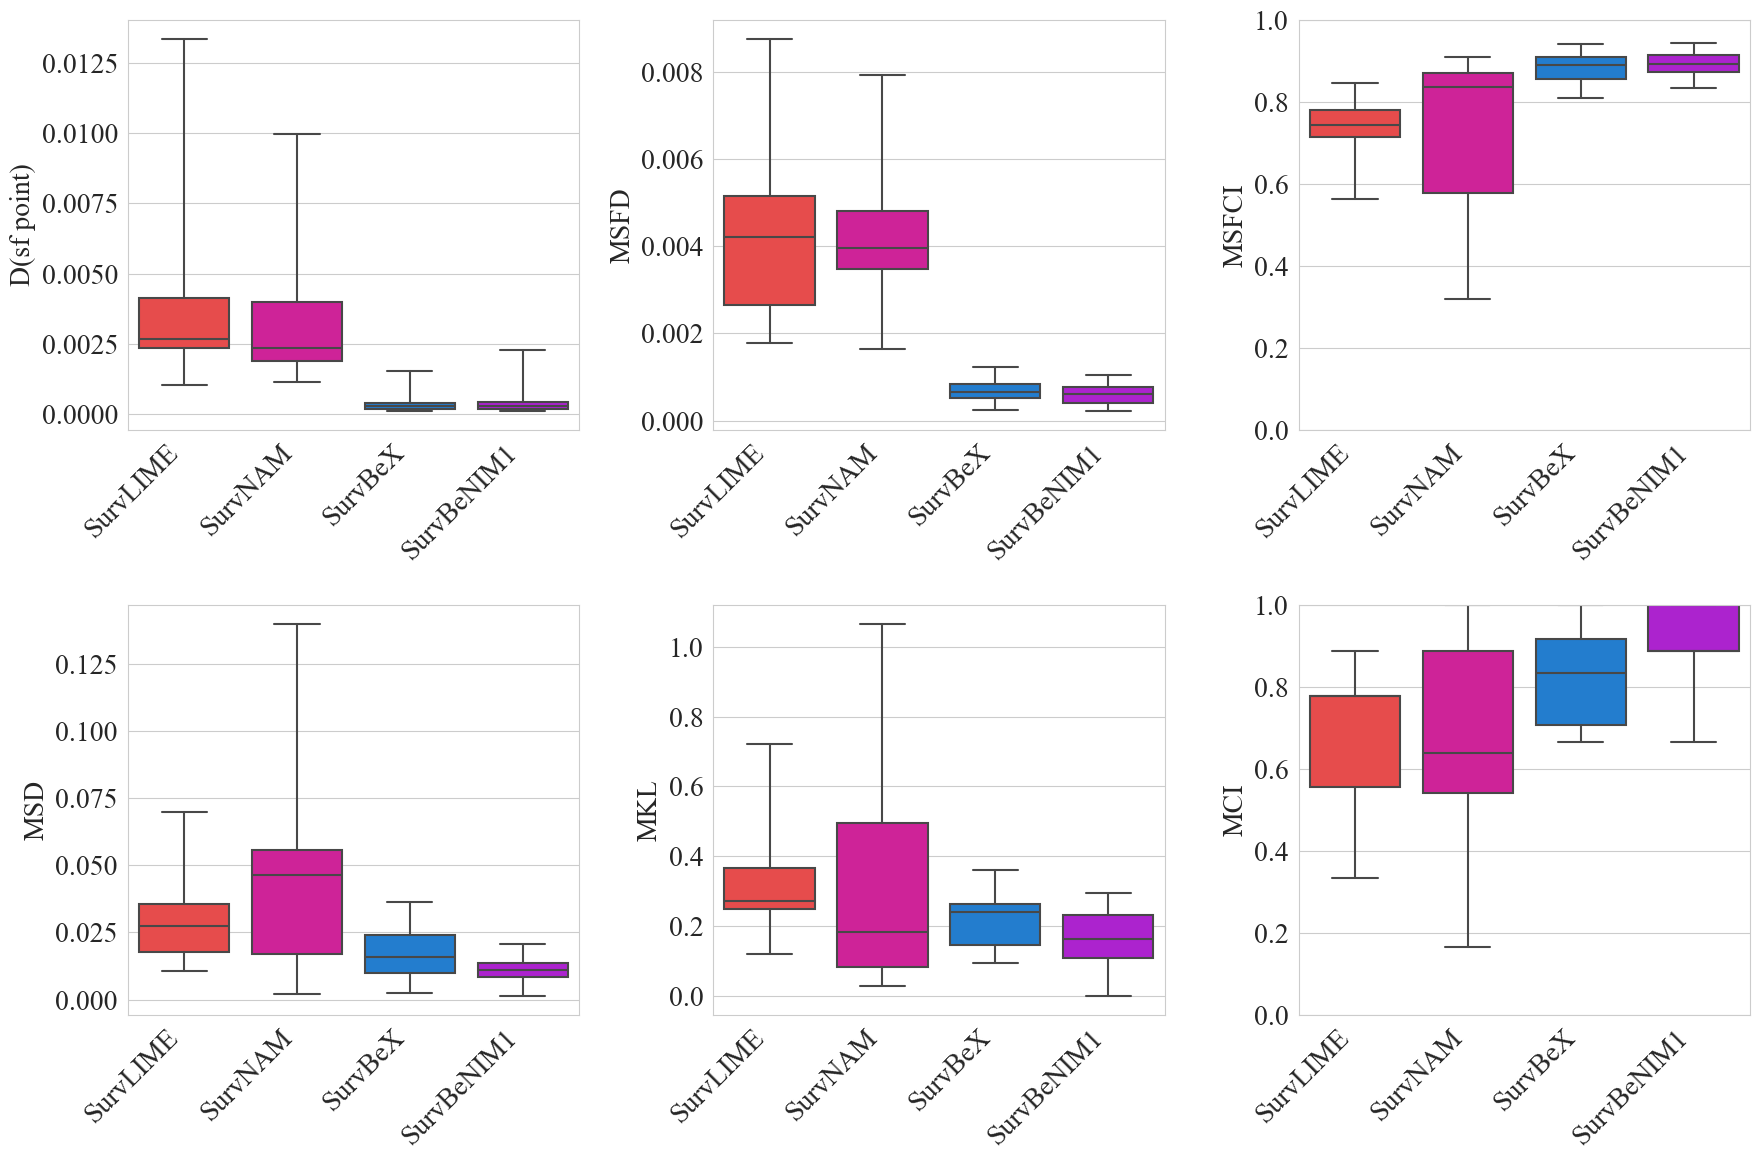

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 20}
matplotlib.rc('font', **font)

fig, axes = plt.subplots(nrows=2, ncols=len(b_metrics_draw), figsize=(6 * len(b_metrics_draw), 6 * 2))


def draw_metric_on_ax(ax, m_name):
    # ax.grid()
    # ax.set_axisbelow(True)
    sns.boxplot(
        data=models_metrics, x='model_name', y=m_name, whis=10000, ax=ax,
        # order=['SurvLIME', 'SurvNAM', 'SurvBeX', 'SurvBeNIM1', 'SurvBeNIM2'],
        order=['SurvLIME', 'SurvNAM', 'SurvBeX', 'SurvBeNIM1'],
        palette=models_colors
    )
    ax.set_xlabel('')
    ax.set_ylabel(f'{labels_map[m_name]}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    if 'cindex' in m_name:
        ax.set_ylim((0, 1))
    fig.tight_layout()


for i, m_name in enumerate({**surv_dp_metrics, **surv_metrics}):
    draw_metric_on_ax(axes[0, i], m_name)

for i, m_name in enumerate(b_metrics_draw.keys()):
    draw_metric_on_ax(axes[1, i], m_name)

plt.savefig(f'{res_dir}/all_metrics.png', dpi=200)
plt.show()


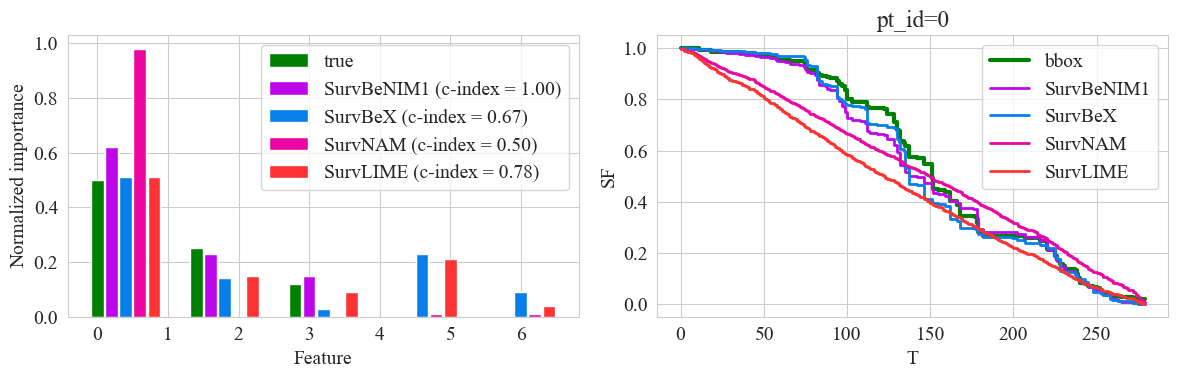

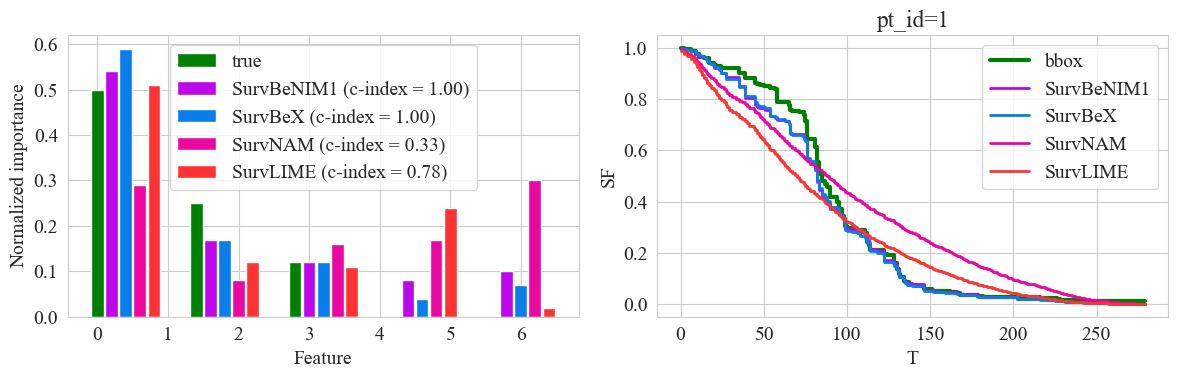

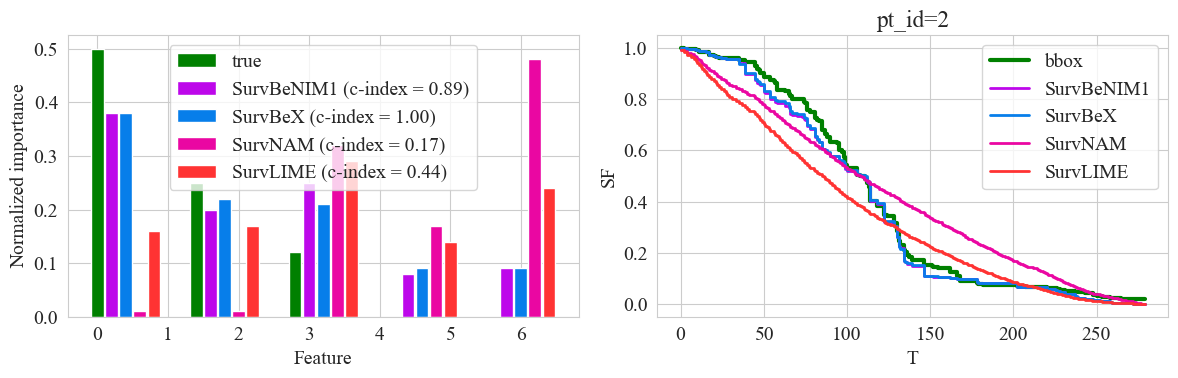

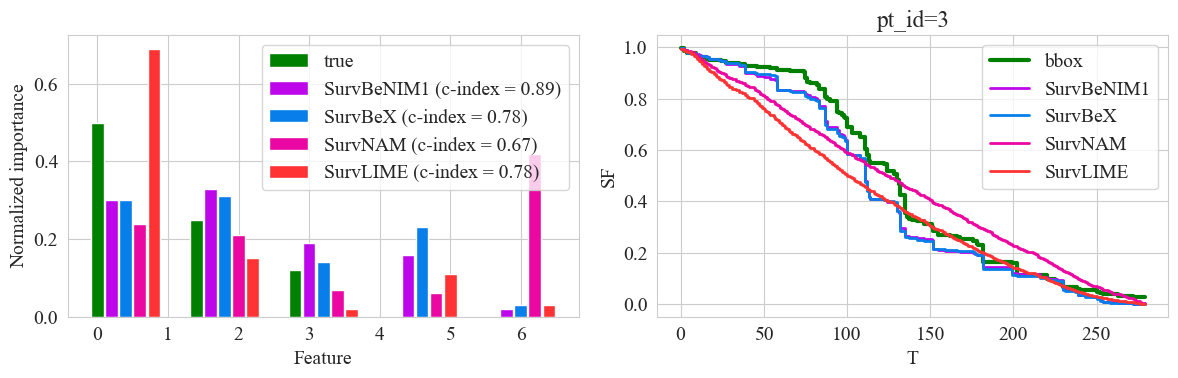

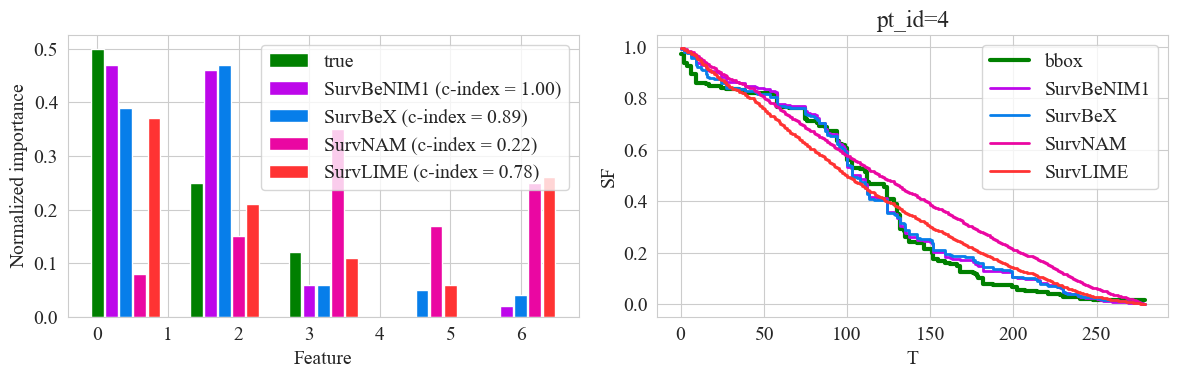

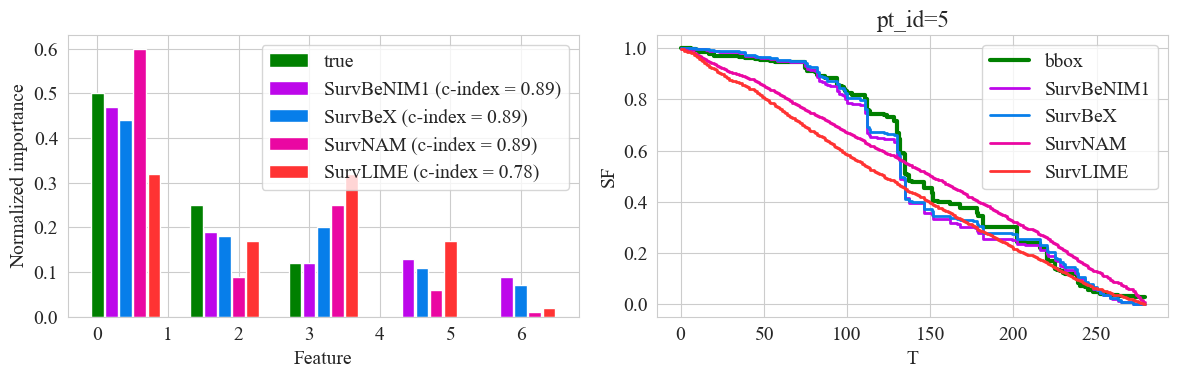

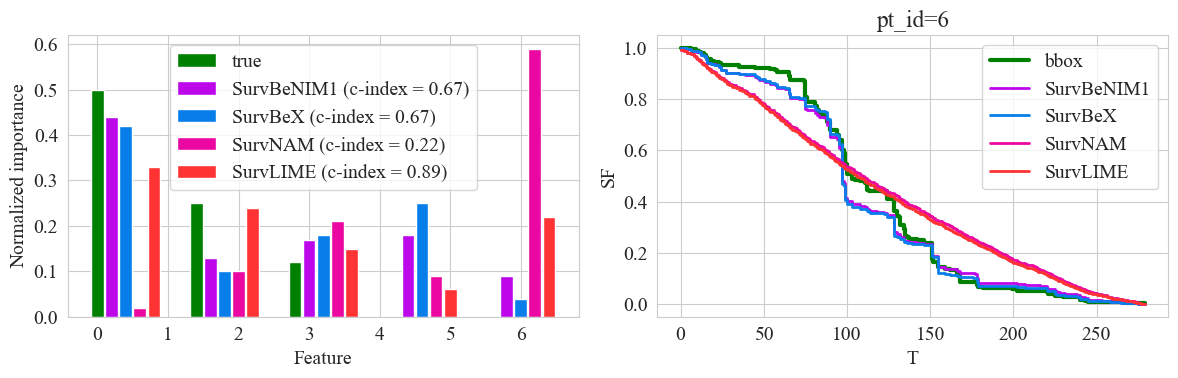

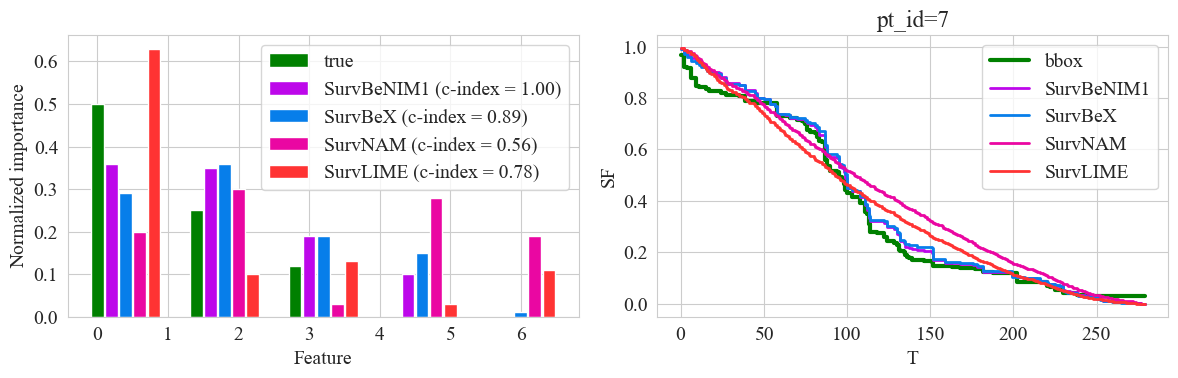

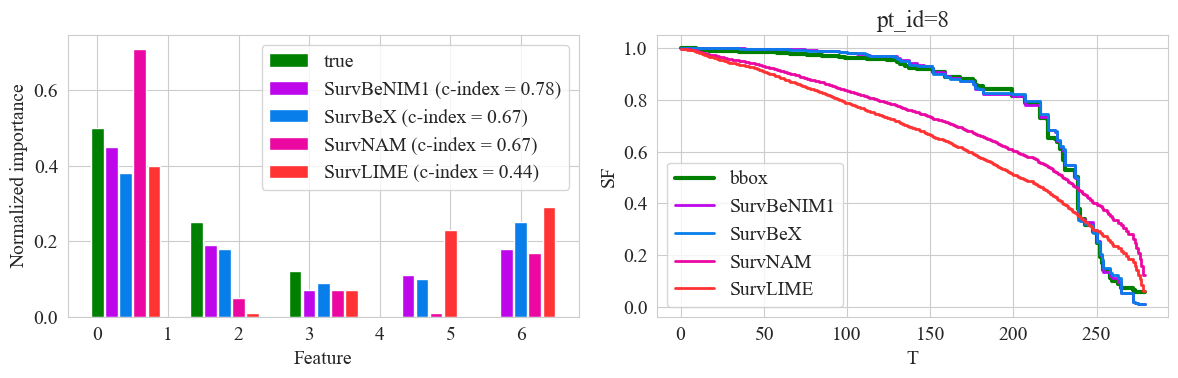

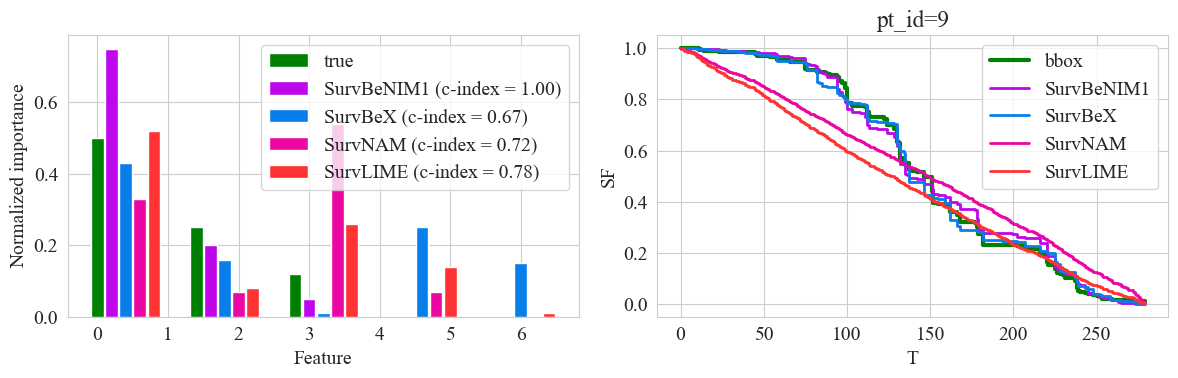

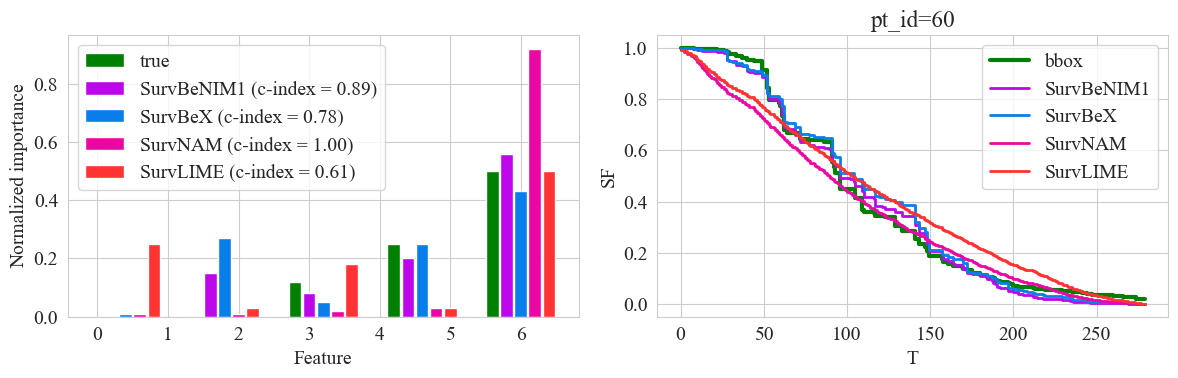

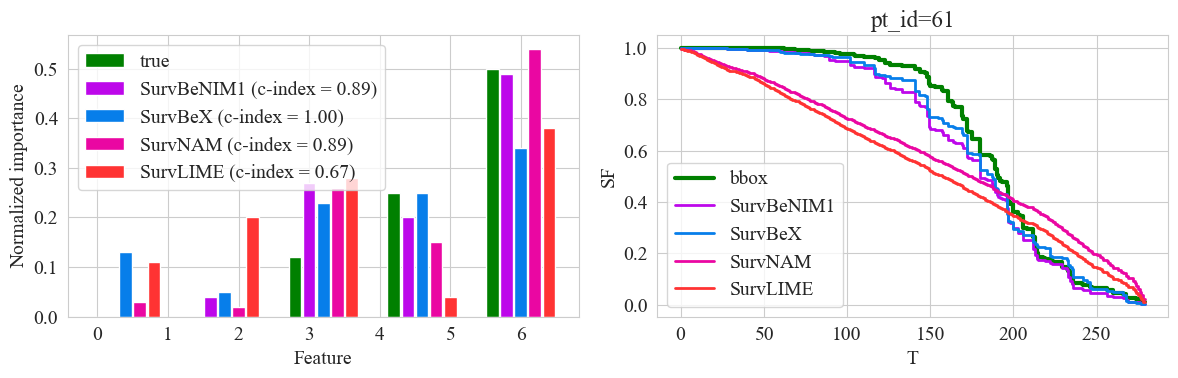

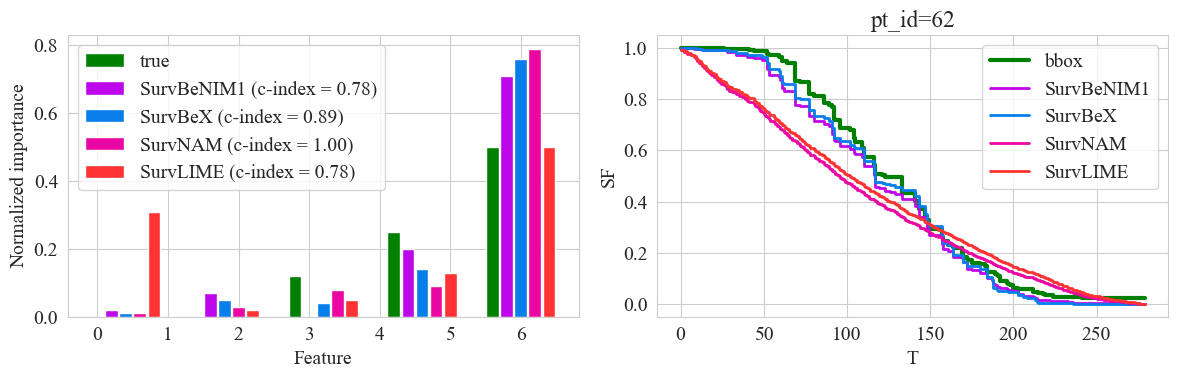

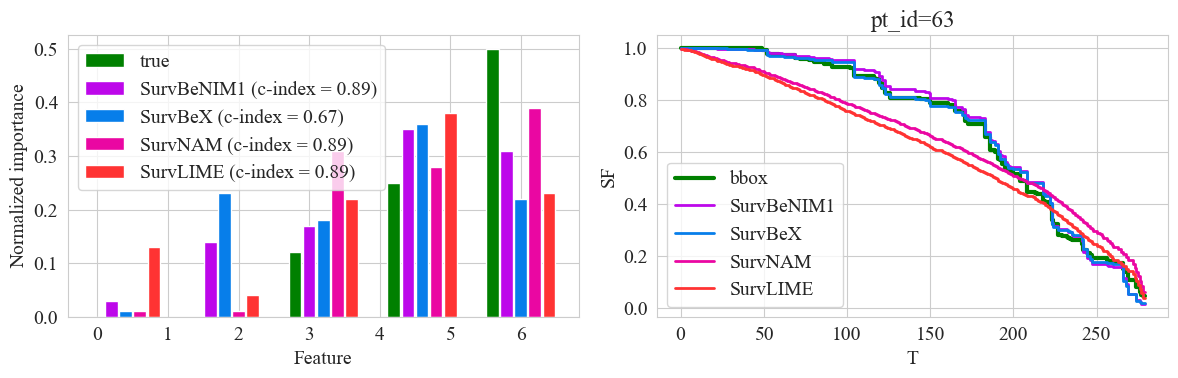

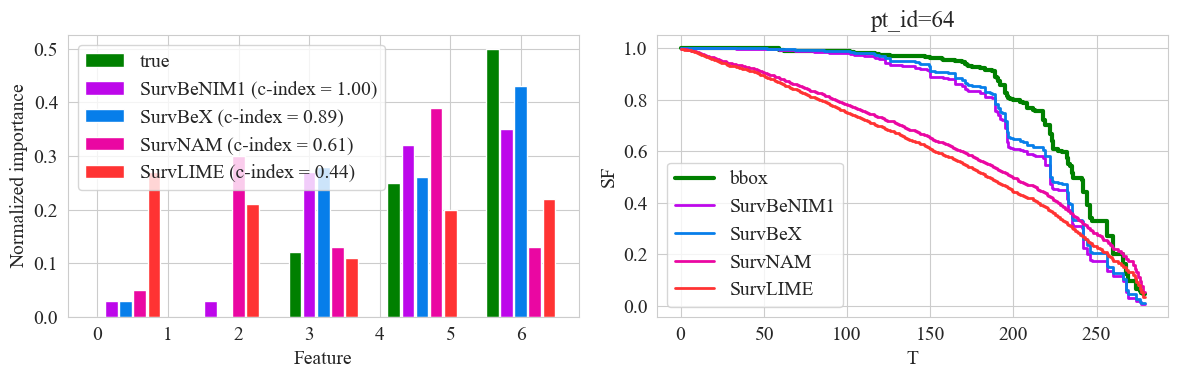

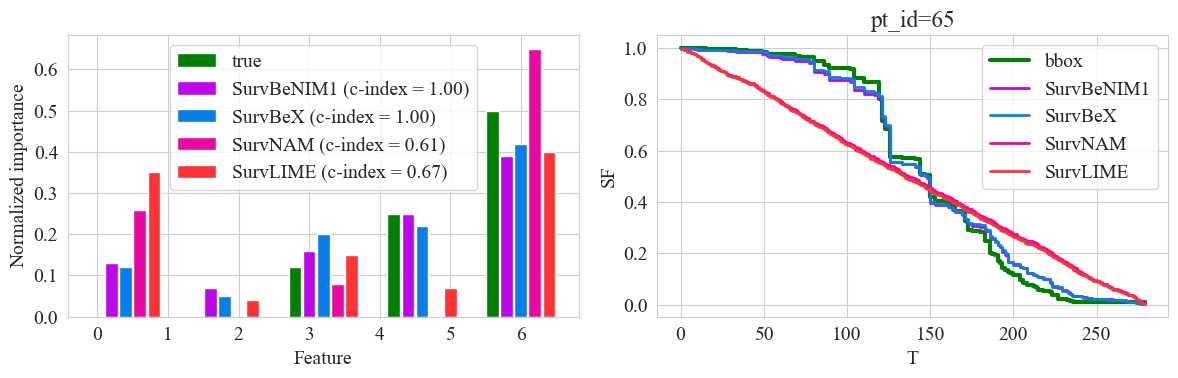

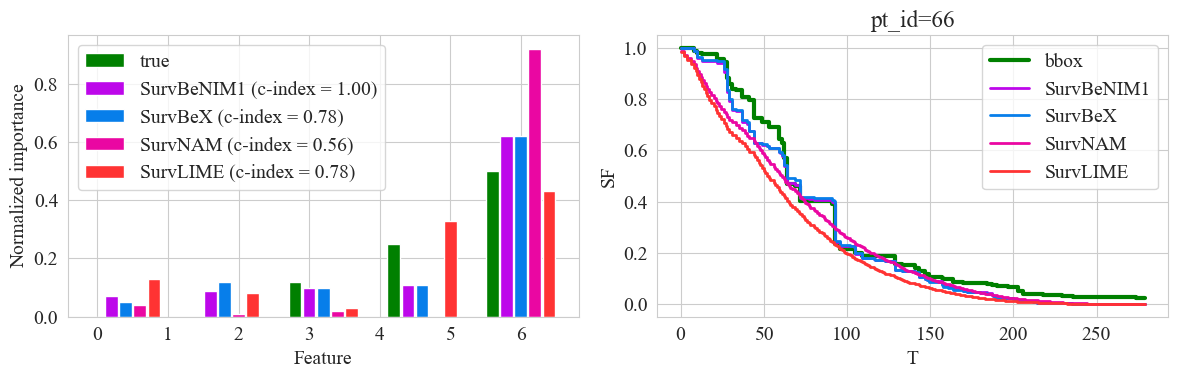

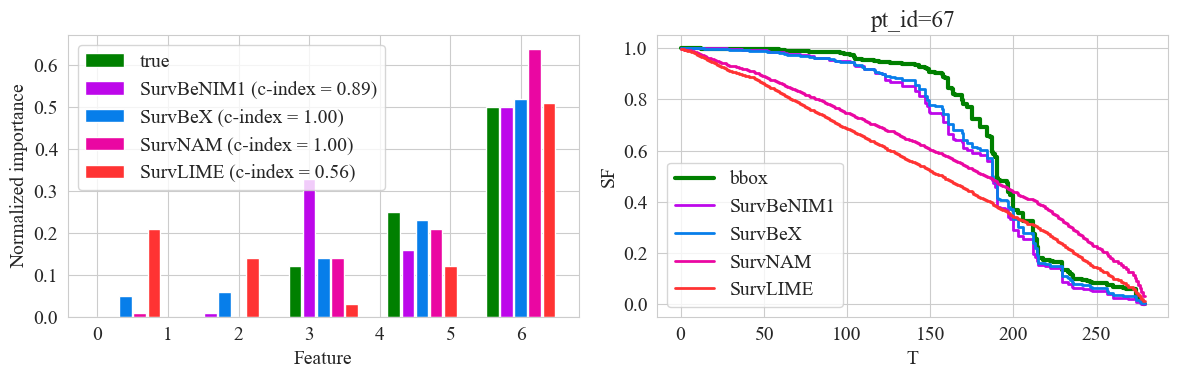

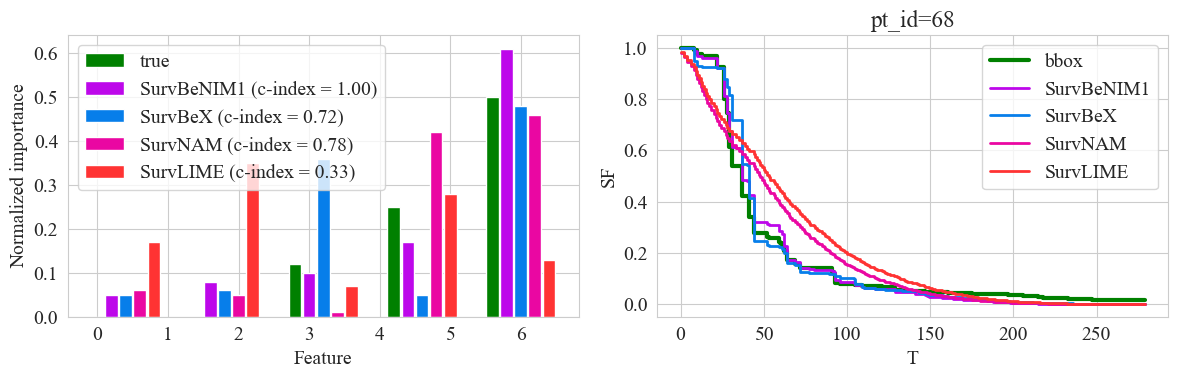

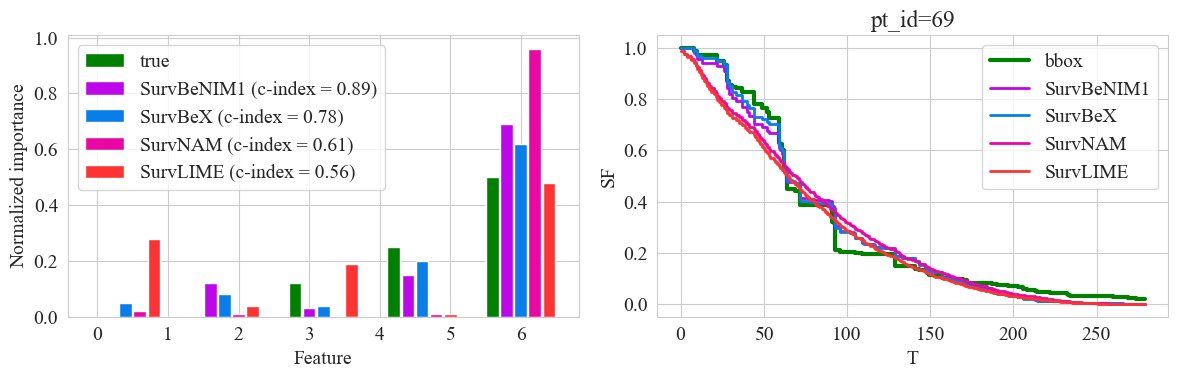

In [67]:
from sksurv.functions import StepFunction
from core.drawing import draw_surv_yo

font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 14}
matplotlib.rc('font', **font)

for model_name, model_res in models_results.items():
    assert len(model_res) == len(ds['test_importances'])


def get_metrics_str(y_true, y_pred):
    return ','.join([f"c-index = {m_func(y_true, y_pred):.2f}" for m_name, m_func in b_metrics_draw.items()][2:3])


def draw_imps_and_sfs(pt_i, pt_id):
    pt_s_funcs = models_dp_s[models_dp_s['pt_i'] == pt_i]
    event_time = ds['test_times'][pt_i]
    unique_times = np.argsort(np.unique(ds['train_times']))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    draw_surv_yo(
        pred_surv=[StepFunction(
            x=unique_times,
            y=pt_s_funcs.iloc[0]['bbox_dp_s'].flatten())
        ],
        time_points=unique_times,
        actual_et=[None],
        draw_args=[dict(label='bbox', color='green', linewidth=3)]
    )

    for model_name in pt_s_funcs['model_name'].unique():
        draw_surv_yo(
            pred_surv=[
                StepFunction(
                    x=unique_times,
                    y=pt_s_funcs[pt_s_funcs['model_name'] == model_name]['explainer_dp_s'].to_numpy()[0]
                    .flatten())
            ],
            time_points=unique_times,
            actual_et=[None],
            draw_args=[dict(label=model_name, color=models_colors[model_name], linewidth=2)]
        )
    plt.sca(ax=axes[1])
    # axes[1].set_title("Survival functions")

    bar_width = 0.2

    ax = axes[0]

    true_coefs = ds['test_importances'][pt_i]
    features_x = np.array(list(range(len(true_coefs)))) * (bar_width * (len(models_colors) + 2))

    ax.bar(x=features_x, height=true_coefs, width=bar_width * 0.9, color='green',
           label=f'true')
    for i, model_name in enumerate(pt_s_funcs['model_name'].unique()):
        curr_imps = models_metrics[models_metrics['model_name'] == model_name].iloc[pt_i]['pred_importance']
        ax.bar(
            x=features_x + 0.2 * (i + 1), height=curr_imps, width=bar_width * 0.9, color=models_colors[model_name],
            label=f'{model_name} ({get_metrics_str(true_coefs, curr_imps)})'
        )

    # ax.set_title(f"Features importances")
    ax.set_xlabel('Feature')
    ax.set_ylabel('Normalized importance')
    plt.title(f'pt_id={pt_id}')
    ax.legend()

    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{res_dir}/pt={pt_i}_imps_and_dps.png', dpi=200)


for pt_i, pt_id in enumerate(test_ids):
    draw_imps_and_sfs(pt_i=pt_i, pt_id=pt_id)


In [68]:
for model_name, model_dir in compared_models.items():
    for test_id in test_ids:
        if model_name in ['SurvBeNIM1', 'SurvNAM']:
            src_path = Path(f'{model_dir}/pt={test_id}/shape_functions.png')
            dest_path = res_dir.joinpath(f'{model_name}_pt={test_id}_shape_functions.png')
            assert src_path.exists(), src_path
            shutil.copy(src=src_path, dst=dest_path)